# SQL CARTO QUERY FUNCTION
# written for PUI2016_Python2

In [52]:
SQL_SOURCE = 'https://anupama16.carto.com/api/v2/sql?q='

import urllib2
import urllib
import StringIO
import ast
import pandas as pd

# for compatibility between Python 2 and 3
#Try Python 3 packages
try:
    from urllib.parse import urlparse, urlencode
    from urllib.request import urlopen, Request
    from urllib.error import HTTPError
#If error, python 2 packages
except ImportError:
    from urlparse import urlparse
    from urllib import urlencode
    from urllib2 import urlopen, Request, HTTPError


def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    '''queries carto datasets from a given carto account
    Arguments: 
    query - string: a valid sql query string
    format - outlut format  OPTIONAL (default CSV)
    source - a valid sql api endpoint OPTIONAL (default carto fb55 account)
    Returns:
    the return of the sql query AS A STRING
    NOTES:
    designed for the carto API, tested only with CSV return format'''
    
    data = urllib.urlencode({'format': format, 'q': query})
    try:
        response = urllib2.urlopen(source, data)
    except urllib2.HTTPError, e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return response.read()

# Task 1

In [53]:
#Select  trips with duration <= 3 hours
task1 = '''
SELECT DISTINCT start_station_id, 
COUNT(tripduration) AS count_trip, 
MAX(tripduration) AS max_trip_duration,
MIN(tripduration) AS min_trip_duration, 
AVG(tripduration) AS avg_trip_duration 
FROM citibike
WHERE tripduration <=10800
GROUP BY start_station_id
ORDER BY avg_trip_duration DESC, start_station_id ASC
LIMIT 10
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(task1)), sep=',')

,start_station_id,count_trip,max_trip_duration,min_trip_duration,avg_trip_duration
0,471,32,2251,60,1218.281250
1,481,13,2270,165,1143.923077
2,2006,79,3459,90,1130.531646
3,2005,7,2513,545,1130.285714
4,2002,45,2426,77,1116.711111
5,431,28,2423,184,1095.535714
6,372,9,2160,233,1083.333333
7,532,50,2167,198,1076.600000
8,332,36,5930,201,1067.111111
9,119,19,2167,278,1044.789474


# Task 2

In [54]:
#Selecting trips started on Feb-02-2015 only
task2a = '''
SELECT bikeid, end_station_id, start_station_id, tripduration, end_station_name, start_station_name
FROM citibike
WHERE starttime >= '2015-02-02' 
AND starttime < '2015-02-03'
ORDER BY start_station_id 
LIMIT 10
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(task2a)), sep=',')

,bikeid,end_station_id,start_station_id,tripduration,end_station_name,start_station_name
0,19154,446,72,1109,W 24 St & 7 Ave,W 52 St & 11 Ave
1,14970,379,72,500,W 31 St & 7 Ave,W 52 St & 11 Ave
2,18199,367,72,1051,E 53 St & Lexington Ave,W 52 St & 11 Ave
3,17379,383,79,986,Greenwich Ave & Charles St,Franklin St & W Broadway
4,21232,328,79,347,Watts St & Greenwich St,Franklin St & W Broadway
5,19004,229,79,1302,Great Jones St,Franklin St & W Broadway
6,20634,238,79,728,Bank St & Washington St,Franklin St & W Broadway
7,16652,151,79,454,Cleveland Pl & Spring St,Franklin St & W Broadway
8,14973,264,82,283,Maiden Ln & Pearl St,St James Pl & Pearl St
9,19583,353,83,312,S Portland Ave & Hanson Pl,Atlantic Ave & Fort Greene Pl


In [55]:
#average trip duration during weekends
task2b = '''
SELECT to_char(starttime, 'Day') as Day_Name,
AVG(tripduration) AS avg_trip_duration 
FROM citibike
WHERE to_char(starttime, 'Day') LIKE 'S%'
GROUP BY Day_Name
ORDER BY avg_trip_duration DESC
LIMIT 10
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(task2b)), sep=',')

,day_name,avg_trip_duration
0,Saturday,686.460825
1,Sunday,638.149200


In [56]:
#average trip duration during weekdays
task2c = '''
SELECT to_char(starttime, 'Day') as Day_Name,
AVG(tripduration) AS avg_trip_duration 
FROM citibike
WHERE to_char(starttime, 'Day') NOT LIKE 'S%'
GROUP BY Day_Name
ORDER BY avg_trip_duration DESC
LIMIT 10
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(task2c)), sep=',')

,day_name,avg_trip_duration
0,Monday,920.862234
1,Tuesday,767.224443
2,Wednesday,697.556559
3,Friday,637.116968
4,Thursday,623.396720


# Task 3

In [57]:
#stations within 500m of Time Square
task3 = '''
SELECT start_station_latitude, start_station_longitude, 
CDB_TransformToWebMercator(CDB_LatLng(start_station_latitude,start_station_longitude)) AS the_geom_webmercator, 
MIN(cartodb_id) AS cartodb_id, 
COUNT(tripduration) AS numtrips FROM citibike

WHERE ST_DWithin(CDB_LatLng(start_station_latitude,start_station_longitude)::geography, CDB_LatLng(40.7577,-73.9857)::geography,500) 

GROUP BY start_station_latitude, start_station_longitude
ORDER BY numtrips
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(task3)), sep=',')

,start_station_latitude,start_station_longitude,the_geom_webmercator,cartodb_id,numtrips
0,40.755273,-73.983169,0101000020110F0000F22A632FBE6A5FC1363A28CFADFB...,1115,112
1,40.756800,-73.982912,0101000020110F00009BB87D02B76A5FC146C144E9E5FB...,19,141
2,40.759291,-73.988597,0101000020110F00001607D538556B5FC119A6CA6F41FC...,124,141
3,40.760647,-73.984427,0101000020110F000020D6742CE16A5FC112F4D73D73FC...,42,213
4,40.757570,-73.990985,0101000020110F00003F9300B2976B5FC1B8B88F3102FC...,783,221
5,40.755136,-73.986580,0101000020110F000004AF971C1D6B5FC17A48F3C1A8FB...,54,251
6,40.756405,-73.990026,0101000020110F0000F55695027D6B5FC186E5BB69D7FB...,33,507


# Task 4

In [58]:
#Find the station that had the longest average trip duration during weekends and within 500m of TimeSquare
task4 = '''SELECT start_station_name, start_station_latitude, start_station_longitude, 
CDB_TransformToWebMercator(CDB_LatLng(start_station_latitude,start_station_longitude)) AS the_geom_webmercator, 
MIN(cartodb_id) AS cartodb_id, 
AVG(tripduration) AS avg_duration FROM citibike

WHERE ST_DWithin(CDB_LatLng(start_station_latitude,start_station_longitude)::geography, CDB_LatLng(40.7577,-73.9857)::geography,500) 
AND date_part('dow', starttime) IN (0,6)
GROUP BY start_station_name, start_station_latitude, start_station_longitude
ORDER BY avg_duration DESC
LIMIT 1
'''

pd.read_csv(StringIO.StringIO(queryCartoDB(task4)), sep=',')

,start_station_name,start_station_latitude,start_station_longitude,the_geom_webmercator,cartodb_id,avg_duration
0,Broadway & W 49 St,40.760647,-73.984427,0101000020110F000020D6742CE16A5FC112F4D73D73FC...,42,1010.104167


# extra

In [59]:
#Lines for trips started from stations within 500m of Times Squares and lasted less than 2 hours
task4e = '''
SELECT ST_Makeline(CDB_TransformToWebMercator(CDB_LatLng(start_station_latitude,start_station_longitude)),
                   CDB_TransformToWebMercator(CDB_LatLng(end_station_latitude,end_station_longitude)))
                    as the_geom_webmercator, MIN(cartodb_id) as cartodb_id, COUNT(tripduration) as numtrips FROM citibike
WHERE ST_DWithin(CDB_LatLng(start_station_latitude,start_station_longitude)::geography, CDB_LatLng(40.7577,-73.9857)::geography,500) 
AND tripduration<7200

GROUP BY start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude
'''
pd.read_csv(StringIO.StringIO(queryCartoDB(task4e)), sep=',')

,the_geom_webmercator,cartodb_id,numtrips
0,0102000020110F000002000000F22A632FBE6A5FC1363A...,12043,1
1,0102000020110F0000020000009BB87D02B76A5FC146C1...,34407,1
2,0102000020110F00000200000004AF971C1D6B5FC17A48...,30188,1
3,0102000020110F0000020000003F9300B2976B5FC1B8B8...,7566,5
4,0102000020110F00000200000020D6742CE16A5FC112F4...,8850,4
5,0102000020110F0000020000003F9300B2976B5FC1B8B8...,31004,1
6,0102000020110F00000200000020D6742CE16A5FC112F4...,4636,2
7,0102000020110F000002000000F55695027D6B5FC186E5...,6788,6
8,0102000020110F000002000000F22A632FBE6A5FC1363A...,20181,2
9,0102000020110F0000020000001607D538556B5FC119A6...,26631,1


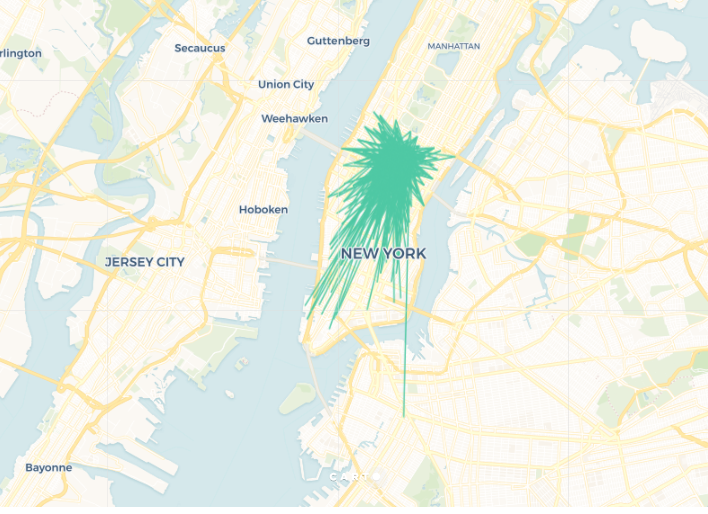

In [60]:
from IPython.display import Image
Image(filename='Carto.PNG')

** Figure 1:  trips started from stations within 500m of Times Squares and lasted less than 2 hours **